# House Price Prediction

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Data File

In [2]:
    df = pd.read_csv('Real_estate.csv')
    df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### Drop Unnecessary Columns

In [3]:
df = df.drop('No', axis=1)
df = df.drop('X1 transaction date', axis=1)
df = df.drop('X3 distance to the nearest MRT station', axis=1)
df

,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,10,24.98298,121.54024,37.9
1,19.5,9,24.98034,121.53951,42.2
2,13.3,5,24.98746,121.54391,47.3
3,13.3,5,24.98746,121.54391,54.8
4,5.0,5,24.97937,121.54245,43.1
...,...,...,...,...,...
409,13.7,0,24.94155,121.50381,15.4
410,5.6,9,24.97433,121.54310,50.0
411,18.8,7,24.97923,121.53986,40.6
412,8.1,5,24.96674,121.54067,52.5


### Make X and Y Variables

In [4]:
xValues = df.drop('Y house price of unit area', axis=1).values
yValues = df['Y house price of unit area'].values

### Split Data for Training and Testing 

In [5]:
length = len(xValues)//5
x_train,x_test = np.split(xValues,[(length*4)],axis=0)
y_train,y_test = np.split(yValues,[(length*4)],axis=0)

In [6]:
def gradientDescent(x,y,_i,_l):
    m = 0
    c = 0
    l = _l
    n = len(x)
    for i in range(_i):
        y_pred = m*x + c
        cost = (1/n)*sum([val**2 for val in (y-y_pred)])
        D_m = (-2/n) * sum(x * (y - y_pred))
        D_c = (-2/n) * sum(y - y_pred)
        m = m - l * D_m
        c = c - l * D_c
    return m,c,cost

-0.2813950486103425 43.09987520540177 180.90425233072892


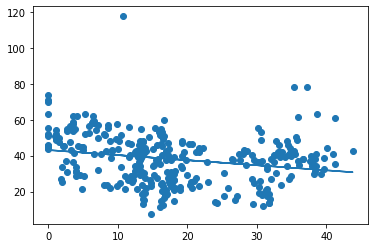

In [9]:
age_train_x = x_train[:,0]
x1m, x1c,cost = gradientDescent(age_train_x, y_train,20000,0.001)
print(x1m, x1c,cost)
y_pred = x1m * age_train_x + x1c
plt.scatter(age_train_x,y_train)
plt.plot(age_train_x,y_pred)
plt.show()

2.692961314032891 27.055000648800462 129.48779413905726


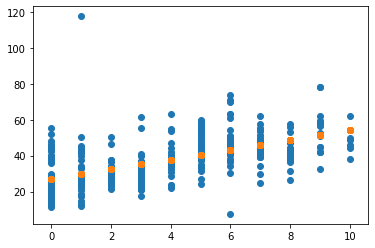

In [35]:
age_train_x = x_train[:,1]
x2m, x2c, cost = gradientDescent(age_train_x, y_train,20000,0.001)
print(x2m, x2c, cost)
y_pred = x2m * age_train_x + x2c
plt.scatter(age_train_x,y_train)
plt.scatter(age_train_x,y_pred)
plt.show()

1.523132136991186 0.045875011588340606 190.64844359284385


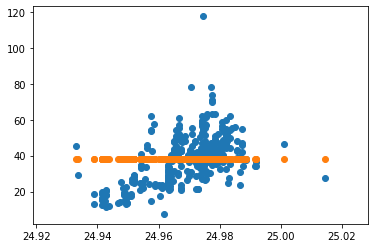

In [36]:
age_train_x = x_train[:,2]
x3m, x3c, cost = gradientDescent(age_train_x, y_train,20000,0.0001)
print(x3m, x3c, cost)
y_pred = x3m * age_train_x + x3c
plt.scatter(age_train_x,y_train)
plt.scatter(age_train_x,y_pred)
plt.show()

0.31325921525377565 0.0025417032110507747 190.8681516336956


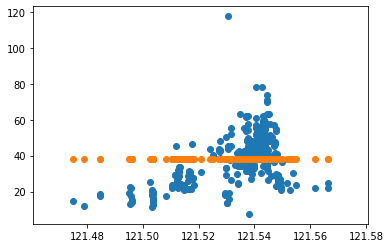

In [37]:
age_train_x = x_train[:,3]
x4m, x4c, cost = gradientDescent(age_train_x, y_train,20000,0.000001)
print(x4m, x4c, cost)
y_pred = x4m * age_train_x + x4c
plt.scatter(age_train_x,y_train)
plt.scatter(age_train_x,y_pred)
plt.show()

-0.2813950486103425 2.692961314032891 1.523132136991186 0.31325921525377565
-44.02073028023725


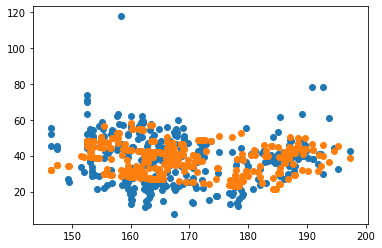

In [56]:
print(x1m,x2m,x3m,x4m)
c = y_train- (x1m*x_train[:,0]) - (x2m*x_train[:,1]) - (x3m*x_train[:,2]) - (x4m*x_train[:,3])
cmean = np.mean(c)
print(cmean)
y_pred = (x1m*x_train[:,0]) + (x2m*x_train[:,1]) + (x3m*x_train[:,2]) + (x4m*x_train[:,3]) + cmean
xActual = x_train[:,0] + x_train[:,1] + x_train[:,2] + x_train[:,3]
plt.scatter(xActual,y_train)
plt.scatter(xActual,y_pred)
plt.show()

In [41]:
sumof = 0
for i in range(0,len(y_train)):
    sumof = sumof + np.abs(y_train[i]-y_pred[i])
print(sumof/len(y_train))

7.9076419953547035


# Predict:

In [33]:
HouseAge = float(input("Enter House Age : "))
ConvStore = float(input("Enter Number of Convenience Stores near House : "))
latitude = float(input("Enter Latitude : "))
longitude = float(input("Enter Longitude : "))
print("The price of per Square Ft : " , cmean + HouseAge*(x1m) + ConvStore*(x2m) + latitude*(x3m) + longitude*(x4m))

Enter House Age : 32
Enter Number of Convenience Stores near House : 10
Enter Latitude : 24.98298
Enter Longitude : 121.54024
The price of per Square Ft :  50.149565419959806
